In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [4]:
df.shape

(34857, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom          26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13760 non-null object
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Latitude         26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34857 non-null object
Propertycount    34854 non-null float64
ParkingArea      34857 non-null object
Price            27247 non-null float64
dtypes: float64(11), in

In [6]:
df.describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Price
count,34857.000000,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,15551.000000,26881.000000,26881.000000,34854.000000,2.724700e+04
mean,3.031012,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,1965.289885,-37.810634,145.001851,7572.888306,1.050173e+06
std,0.969933,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,37.328178,0.090279,0.120169,4428.090313,6.414671e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000,8.500000e+04
25%,2.000000,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,1940.000000,-37.862950,144.933500,4385.000000,6.350000e+05
50%,3.000000,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,1970.000000,-37.807600,145.007800,6763.000000,8.700000e+05
75%,4.000000,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,2000.000000,-37.754100,145.071900,10412.000000,1.295000e+06
max,16.000000,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,2106.000000,-37.390200,145.526350,21650.000000,1.120000e+07


In [7]:
pd.DataFrame( df.isnull().sum(), columns= ['# missing values'])

,# missing values
Suburb,0
Address,0
Rooms,0
Type,0
Method,0
SellerG,0
Date,0
Distance,1
Postcode,1
Bedroom,8217


In [8]:
df.loc[df.Distance.isnull()]

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
12355,Fawkner Lot,1/3 Brian St,3,h,SP,Brad,6/1/2018,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,NaN,Detached Garage,616000.0


In [13]:
df.loc[df.Regionname == 'Northern Metropolitan'][['Distance','Price']].describe()

,Distance,Price
count,9559.000000,7.867000e+03
mean,9.121278,8.614289e+05
std,5.866904,4.372079e+05
min,0.000000,1.210000e+05
25%,4.200000,5.820000e+05
50%,8.400000,7.525000e+05
75%,12.400000,1.020000e+06
max,25.900000,6.500000e+06


In [29]:
df.loc[((df.Regionname == 'Northern Metropolitan') & (df.ParkingArea == 'Detached Garage') & (df.Rooms == 3) & (df.Type == 'h') & (df.Price <= 620000) & (df.Price >= 610000)) ].describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Price
count,13.0,12.000000,12.000000,11.0,11.000000,11.000000,10.000000,7.000000,11.000000,11.000000,12.000000,13.000000
mean,3.0,15.600000,3068.250000,3.0,1.272727,1.545455,546.400000,1974.285714,-37.676495,144.988054,11545.083333,614769.230769
std,0.0,4.181344,14.617082,0.0,0.467099,0.522233,199.131001,15.118579,0.046541,0.066622,4787.699285,4166.410249
min,3.0,8.800000,3046.000000,3.0,1.000000,1.000000,124.000000,1950.000000,-37.744100,144.872600,2474.000000,610000.000000
25%,3.0,11.875000,3060.250000,3.0,1.000000,1.000000,492.250000,1965.000000,-37.709885,144.940725,8870.000000,610000.000000
50%,3.0,16.300000,3072.500000,3.0,1.000000,2.000000,531.500000,1980.000000,-37.676800,144.987200,10727.500000,615000.000000
75%,3.0,19.600000,3077.500000,3.0,1.500000,2.000000,657.000000,1985.000000,-37.649680,145.038240,14810.250000,619000.000000
max,3.0,20.600000,3088.000000,3.0,2.000000,2.000000,829.000000,1990.000000,-37.595850,145.092080,21650.000000,620000.000000


In [34]:
df_1hotencd = pd.get_dummies(df, prefix='Parking', columns=['ParkingArea']) #This function does One-Hot-Encoding on categorical text

In [35]:
df_1hotencd.describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Price,Parking_Attached Garage,Parking_Carport,Parking_Detached Garage,Parking_Indoor,Parking_Outdoor Stall,Parking_Parkade,Parking_Parking Pad,Parking_Underground
count,34857.000000,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,15551.000000,26881.000000,26881.000000,34854.000000,2.724700e+04,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000
mean,3.031012,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,1965.289885,-37.810634,145.001851,7572.888306,1.050173e+06,0.179103,0.179103,0.179103,0.164156,0.059701,0.134320,0.029865,0.074648
std,0.969933,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,37.328178,0.090279,0.120169,4428.090313,6.414671e+05,0.383444,0.383444,0.383444,0.370423,0.236936,0.341001,0.170217,0.262826
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,1940.000000,-37.862950,144.933500,4385.000000,6.350000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,1970.000000,-37.807600,145.007800,6763.000000,8.700000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,2000.000000,-37.754100,145.071900,10412.000000,1.295000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,2106.000000,-37.390200,145.526350,21650.000000,1.120000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df.head(10)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN
5,Alphington,6 Smith St,4,h,S,Brace,3/9/2016,6.4,3078.0,3.0,...,853.0,263,1930.0,Darebin City Council,-37.7707,145.0318,Northern Metropolitan,2211.0,Underground,2000000.0
6,Alphington,5/6 Yarralea St,3,h,S,Jellis,3/9/2016,6.4,3078.0,3.0,...,208.0,inf,2013.0,Darebin City Council,-37.7854,145.0325,Northern Metropolitan,2211.0,Outdoor Stall,1110000.0
7,Altona,158 Queen St,3,h,VB,Greg,3/9/2016,13.8,3018.0,3.0,...,352.0,242,2015.0,Hobsons Bay City Council,-37.8700,144.8250,Western Metropolitan,5301.0,Parking Pad,520000.0
8,Altona North,1 Beuron Rd,3,h,SP,Williams,3/9/2016,11.1,3025.0,3.0,...,620.0,108,1950.0,Hobsons Bay City Council,-37.8290,144.8480,Western Metropolitan,5132.0,Carport,NaN
9,Altona North,45 Hearn St,5,h,S,FN,3/9/2016,11.1,3025.0,5.0,...,592.0,251,1965.0,Hobsons Bay City Council,-37.8388,144.8567,Western Metropolitan,5132.0,Detached Garage,1085000.0


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
dfle = df.copy()

In [45]:
dfle['methodID'] = le.fit_transform(dfle.Method)
dfle

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,methodID
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,inf,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,NaN,6
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0,0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0,2
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,inf,NaN,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1455000.0,2
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN,4
5,Alphington,6 Smith St,4,h,S,Brace,3/9/2016,6.4,3078.0,3.0,...,263,1930.0,Darebin City Council,-37.77070,145.03180,Northern Metropolitan,2211.0,Underground,2000000.0,2
6,Alphington,5/6 Yarralea St,3,h,S,Jellis,3/9/2016,6.4,3078.0,3.0,...,inf,2013.0,Darebin City Council,-37.78540,145.03250,Northern Metropolitan,2211.0,Outdoor Stall,1110000.0,2
7,Altona,158 Queen St,3,h,VB,Greg,3/9/2016,13.8,3018.0,3.0,...,242,2015.0,Hobsons Bay City Council,-37.87000,144.82500,Western Metropolitan,5301.0,Parking Pad,520000.0,7
8,Altona North,1 Beuron Rd,3,h,SP,Williams,3/9/2016,11.1,3025.0,3.0,...,108,1950.0,Hobsons Bay City Council,-37.82900,144.84800,Western Metropolitan,5132.0,Carport,NaN,5
9,Altona North,45 Hearn St,5,h,S,FN,3/9/2016,11.1,3025.0,5.0,...,251,1965.0,Hobsons Bay City Council,-37.83880,144.85670,Western Metropolitan,5132.0,Detached Garage,1085000.0,2


In [51]:
from sklearn.preprocessing import StandardScaler
stdscl = StandardScaler()

In [80]:
dfscaled = df.copy()

In [81]:
dfscaled['scaledPrice'] = stdscl.fit_transform(dfscaled[['Price']])

In [82]:
dfscaled[['Price','scaledPrice']].describe()

,Price,scaledPrice
count,2.724700e+04,2.724700e+04
mean,1.050173e+06,5.956951e-17
std,6.414671e+05,1.000018e+00
min,8.500000e+04,-1.504662e+00
25%,6.350000e+05,-6.472365e-01
50%,8.700000e+05,-2.808821e-01
75%,1.295000e+06,3.816737e-01
max,1.120000e+07,1.582312e+01


In [83]:
from sklearn.preprocessing import MinMaxScaler
mnmxScl = MinMaxScaler()

(array([2462.,  175.,  559.,  924., 1013.,  980.,  884.,  921.,  834.,
         695.,  654.,  741.,  649., 1337., 1539., 1506., 1694., 1271.,
         979.,  615.,  473.,  372.,  239.,  206.,  153.,  161.,  101.,
          87.,   53.,   44.,   49.,   34.,   33.,   26.,   15.,   16.,
          28.,   19.,   16.,   19.,   11.,   19.,    8.,   10.,   15.,
          10.,    8.,    7.,    4.,   15.]),
 array([   0.  ,   39.94,   79.88,  119.82,  159.76,  199.7 ,  239.64,
         279.58,  319.52,  359.46,  399.4 ,  439.34,  479.28,  519.22,
         559.16,  599.1 ,  639.04,  678.98,  718.92,  758.86,  798.8 ,
         838.74,  878.68,  918.62,  958.56,  998.5 , 1038.44, 1078.38,
        1118.32, 1158.26, 1198.2 , 1238.14, 1278.08, 1318.02, 1357.96,
        1397.9 , 1437.84, 1477.78, 1517.72, 1557.66, 1597.6 , 1637.54,
        1677.48, 1717.42, 1757.36, 1797.3 , 1837.24, 1877.18, 1917.12,
        1957.06, 1997.  ]),
 <a list of 50 Patch objects>)

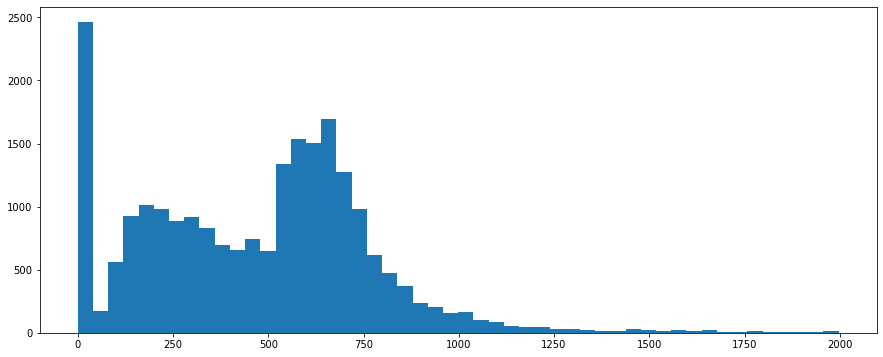

In [91]:
plt.figure(figsize=[15,6])
plt.hist(dfscaled.Landsize[(dfscaled.Landsize < 2000)], bins = 50)

In [88]:
dfscaled.Landsize[dfscaled.Landsize > 2000] = np.NaN

In [89]:
dfscaled['scaledLandsize'] = mnmxScl.fit_transform(dfscaled[['Landsize']])
dfscaled[['Landsize','scaledLandsize']].describe()

,Landsize,scaledLandsize
count,22686.000000,22686.000000
mean,467.900115,0.233950
std,304.246674,0.152123
min,0.000000,0.000000
25%,220.000000,0.110000
50%,510.000000,0.255000
75%,663.000000,0.331500
max,2000.000000,1.000000


In [104]:
from sklearn.preprocessing import FunctionTransformer
logTrans = FunctionTransformer(np.log1p)

In [105]:
dfscaled['scaledDistance'] = logTrans.fit_transform(dfscaled[['Distance']])

In [110]:
dfscaled[['Distance','scaledDistance']].describe()

,Distance,scaledDistance
count,34857.000000,34857.000000
mean,11.185082,2.351643
std,6.788855,0.562542
min,0.000000,0.000000
25%,6.400000,2.001480
50%,10.300000,2.424803
75%,14.000000,2.708050
max,48.100000,3.893859


In [112]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe

missing_check(df)

,Total,Percent
BuildingArea,21097,0.605244
YearBuilt,19306,0.553863
Landsize,11810,0.338813
Car,8728,0.250394
Bathroom,8226,0.235993
Bedroom,8217,0.235735
Longtitude,7976,0.228821
Latitude,7976,0.228821
Price,7610,0.218321
CouncilArea,3,0.000086


In [130]:
dfz = df.copy()

In [132]:
dfz.drop(dfz[dfz.Distance.isnull()].index, inplace=True)

In [137]:
dfz['zDistance'] = st.zscore(dfz.Distance)
dfz[['Distance','zDistance']].describe()

,Distance,zDistance
count,34856.000000,3.485600e+04
mean,11.184929,-8.042269e-16
std,6.788892,1.000014e+00
min,0.000000,-1.647557e+00
25%,6.400000,-7.048275e-01
50%,10.300000,-1.303515e-01
75%,14.000000,4.146642e-01
max,48.100000,5.437647e+00


In [144]:
dfz[dfz.zDistance > 3]

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,zDistance
4088,Berwick,96 Avebury Dr,4,h,SP,C21,1/7/2017,35.2,3806.0,4.0,...,NaN,NaN,Casey City Council,-38.02434,145.33117,Eastern Victoria,17093.0,Detached Garage,627500.0,3.537457
4138,Clyde North,11 Riverbank Cl,4,h,SP,Harcourts,1/7/2017,43.4,3978.0,NaN,...,NaN,NaN,Casey City Council,NaN,NaN,Eastern Victoria,2987.0,Detached Garage,689000.0,4.745330
4151,Cranbourne,26 Mundaring Dr,5,h,S,O'Brien,1/7/2017,34.7,3977.0,5.0,...,NaN,NaN,Casey City Council,-38.10687,145.28110,South-Eastern Metropolitan,7680.0,Underground,572000.0,3.463806
4182,Emerald,18 Auhl Rd,3,h,PI,Barry,1/7/2017,36.9,3782.0,3.0,...,110,1950.0,Cardinia Shire Council,-37.93248,145.46271,Eastern Victoria,2259.0,Attached Garage,NaN,3.787870
4208,Frankston,2/195 Beach St,2,u,S,O'Brien,1/7/2017,38.0,3199.0,NaN,...,NaN,NaN,Frankston City Council,NaN,NaN,South-Eastern Metropolitan,17055.0,Parkade,400000.0,3.949901
4209,Frankston,42 Kars St,3,h,S,hockingstuart,1/7/2017,38.0,3199.0,3.0,...,NaN,NaN,Frankston City Council,-38.15230,145.11874,South-Eastern Metropolitan,17055.0,Carport,640000.0,3.949901
4210,Frankston,1/8 Nott Av,3,h,PI,hockingstuart,1/7/2017,38.0,3199.0,NaN,...,NaN,NaN,Frankston City Council,NaN,NaN,South-Eastern Metropolitan,17055.0,Detached Garage,NaN,3.949901
4211,Frankston North,17 Windoo St,3,h,S,Ray,1/7/2017,36.9,3200.0,3.0,...,109,1960.0,Frankston City Council,-38.11948,145.14928,Eastern Victoria,2500.0,Attached Garage,611000.0,3.787870
4212,Frankston South,169 Humphries Rd,3,h,SP,hockingstuart,1/7/2017,38.0,3199.0,3.0,...,3647,NaN,Frankston City Council,-38.18163,145.11457,South-Eastern Metropolitan,7566.0,Indoor,NaN,3.949901
4213,Frankston South,14 Poinciana St,3,h,S,hockingstuart,1/7/2017,38.0,3199.0,3.0,...,174,1960.0,Frankston City Council,-38.16492,145.12656,South-Eastern Metropolitan,7566.0,Carport,755000.0,3.949901


(array([1.060e+02, 6.060e+02, 1.339e+03, 1.454e+03, 1.519e+03, 2.148e+03,
        2.364e+03, 1.690e+03, 2.834e+03, 1.990e+03, 2.403e+03, 2.753e+03,
        1.839e+03, 1.391e+03, 2.474e+03, 1.326e+03, 9.680e+02, 8.250e+02,
        7.650e+02, 3.700e+02, 4.150e+02, 6.250e+02, 3.750e+02, 3.580e+02,
        1.540e+02, 2.540e+02, 2.390e+02, 8.600e+01, 2.170e+02, 5.600e+01,
        7.200e+01, 1.100e+01, 2.930e+02, 1.100e+01, 8.000e+00, 3.100e+01,
        1.600e+02, 0.000e+00, 2.700e+01, 1.740e+02, 7.000e+00, 2.000e+00,
        1.800e+01, 0.000e+00, 0.000e+00, 3.100e+01, 2.000e+00, 3.300e+01,
        0.000e+00, 3.300e+01]),
 array([-1.64755738, -1.50585329, -1.36414921, -1.22244512, -1.08074104,
        -0.93903695, -0.79733287, -0.65562878, -0.51392469, -0.37222061,
        -0.23051652, -0.08881244,  0.05289165,  0.19459574,  0.33629982,
         0.47800391,  0.61970799,  0.76141208,  0.90311617,  1.04482025,
         1.18652434,  1.32822842,  1.46993251,  1.6116366 ,  1.75334068,
         1.

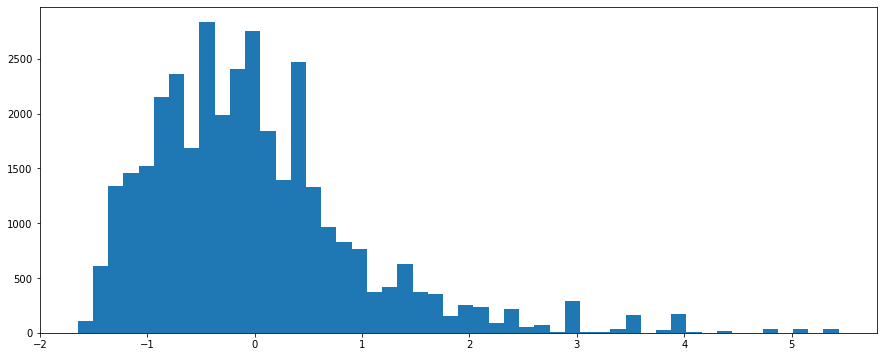

In [135]:
plt.figure(figsize=[15,6])
plt.hist(z_dist, bins = 50)